In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import plotly.express as px

# Reading data

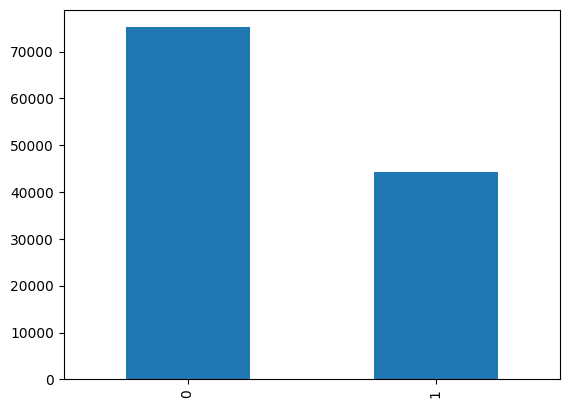

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.is_canceled.value_counts().plot(kind='bar')
plt.show()
df.head()

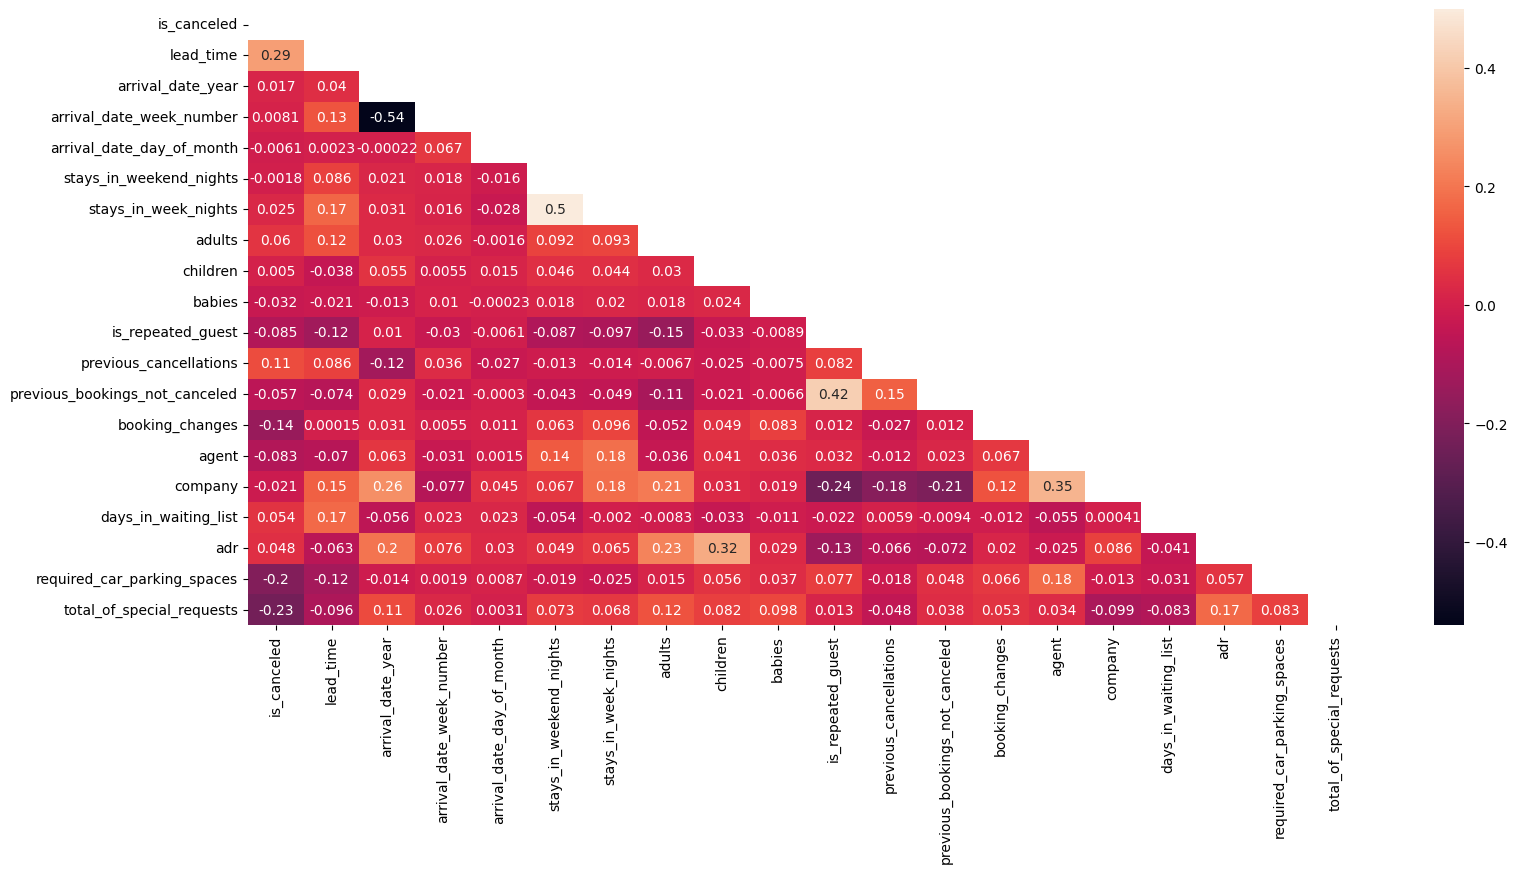

In [4]:
cor = df.corr()
mask = np.zeros_like(cor, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18, 8))
sns.heatmap(cor, mask=mask, annot=True)
plt.show()

In [5]:
cor.is_canceled.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [6]:
fig = px.imshow(cor, width=700, height=700)
fig.show()

# Data cleaning and managing missing values

In [16]:
df.loc[df.agent.isnull() == False, 'agent'] = 'Agent'
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,Agent,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,Agent,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [17]:
df.agent.fillna('No_Agent', inplace=True)

In [18]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,No_Agent,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,No_Agent,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,No_Agent,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,Agent,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,Agent,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


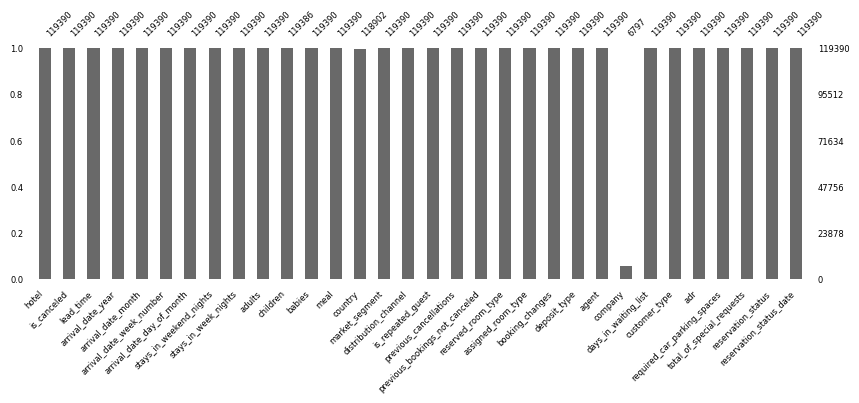

children         4
country        488
company     112593
dtype: int64

In [19]:
NaN = df.isnull().sum()[df.isnull().sum() > 0]
msn.bar(df, figsize=(10, 3), fontsize=6)
plt.show()
NaN


In [24]:
df.country.fillna('unknown', inplace=True)

In [30]:
df.children.fillna(0, inplace=True)

In [32]:
df.isnull().sum()[df.isnull().sum()>0]

company    112593
dtype: int64

In [68]:
df.loc[(df.market_segment == 'Corporate') | (df.distribution_channel == 'Corporate') & (df.company.isnull() == True), 'company'] = 'Corporate'

In [69]:
df.company.fillna('Individuals', inplace=True)

In [70]:
df.loc[(df.company.isnull() == False) & (
    df.company != 'Individuals'), 'company'] = 'Corporate'

In [71]:
df.company.value_counts()

Individuals    111769
Corporate        7621
Name: company, dtype: int64

Series([], dtype: int64)

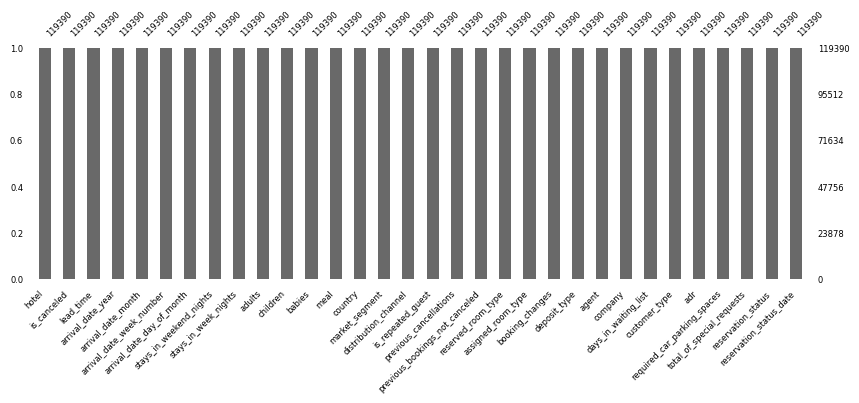

In [73]:
msn.bar(df, figsize=(10,3), fontsize=6)
plt.show
df.isnull().sum()[df.isnull().sum()>0]
